In [1]:
from capymoa.cluster import Clustream_with_kmeans as WithKmeans
from capymoa.stream.generator import RandomRBFGeneratorDrift
from capymoa.cluster.evaluation import online_evaluation_clustering
from capymoa.cluster.visualization import plot_clustering_state

stream = RandomRBFGeneratorDrift(
    number_of_attributes=2,
    number_of_centroids=10,
    number_of_drifting_centroids=1,
    magnitude_of_change=0.001,
)
clustream = WithKmeans(
    schema=stream.get_schema(),
    time_window=1000,
    max_num_kernels=25,
    kernel_radi_factor=2,
    k_option=5,
)
result = online_evaluation_clustering(stream, clustream, update_interval=100, max_instances=2000)


## BICO

In [ ]:
from capymoa.cluster import BICO
bico = BICO(
	schema=stream.get_schema(),
	num_clusters=5,
	num_dimensions=2,
)
resultBICO = online_evaluation_clustering(stream, bico, update_interval=100, max_instances=2000)

Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipped because line dimension is 3 instead of 10
Line skipp

java.lang.IndexOutOfBoundsException: java.lang.IndexOutOfBoundsException: Index 0 out of bounds for length 0

## CluStream With Kmeans

In [3]:
from capymoa.cluster import Clustream_with_kmeans as WithKmeans

## CluStream

In [4]:
from capymoa.cluster import Clustream

## ClusTree

In [5]:
from capymoa.cluster import ClusTree

## CobWeb

In [6]:
from capymoa.cluster import CobWeb

## ConfStream

In [7]:
from capymoa.cluster import ConfStream

## DenStream

In [8]:
from capymoa.cluster import Denstream_with_dbscan

## DStream

In [9]:
from capymoa.cluster import DStream

## StreamKM++

In [10]:
from capymoa.cluster import StreamKM

In [11]:
import pandas as pd
dic = {
    'Silhouette with past window': result.silhouette_past(),
    'Silhouette with future window': result.silhouette_future(),
    'SSQ with past window': result.ssq_past(),
    'SSQ with future window': result.ssq_future(),
    'BSS with past window': result.bss_past(),
    'BSS with future window': result.bss_future()
}
result_df = pd.DataFrame(dic)
result_df

,Silhouette with past window,Silhouette with future window,SSQ with past window,SSQ with future window,BSS with past window,BSS with future window
0,0.214520,0.206258,12.348883,23.349831,19.907025,14.258868
1,0.580514,0.518036,13.784443,15.187980,31.083108,21.524202
2,0.439534,0.260895,22.579559,24.250627,13.509848,30.566998
3,0.502339,0.554466,14.525022,12.171403,35.947133,19.383748
4,0.503354,0.465647,11.580549,23.131471,19.768444,29.474830
5,0.425129,0.213684,27.447932,26.802111,33.005725,33.958588
6,0.335901,0.332713,17.119314,21.938509,32.651719,28.647580
7,0.411333,0.517936,22.703386,16.178341,23.748433,32.079238
8,0.461642,0.295770,26.290024,35.305370,27.110281,37.559226
9,0.111494,0.263350,33.940963,28.918627,45.038755,26.072470


Processed 100 instances.


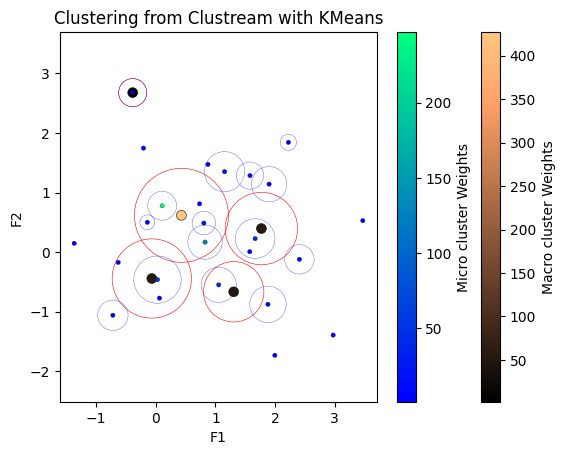

Processed 200 instances.


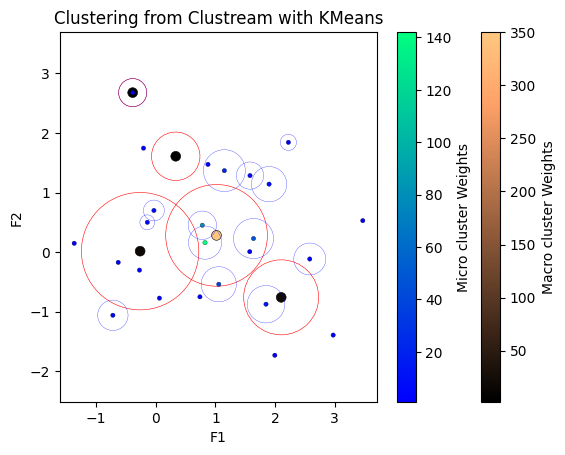

Processed 300 instances.


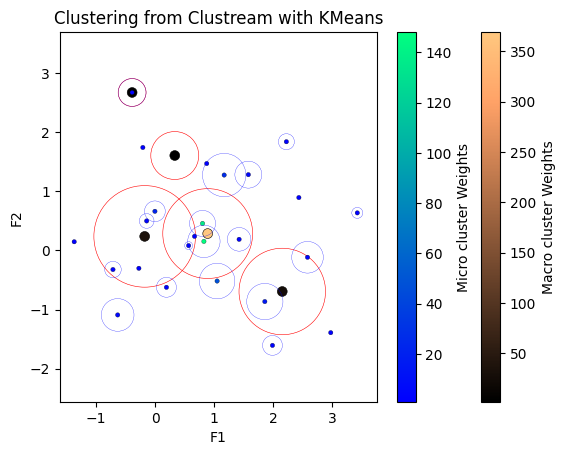

In [12]:
instancesSeen = 0
updateInterval = 100
while stream.has_more_instances() and instancesSeen < 300:
    instance = stream.next_instance()
    clustream.train(instance)
    instancesSeen += 1
    if instancesSeen % updateInterval == 0:
        print(f"Processed {instancesSeen} instances.")
        plot_clustering_state(clustream)
        # by default, plot_clustering_state only shows the image and does not save it

## 2. Using the Clustering Evaluator


In [13]:
from capymoa.cluster.evaluation import ClusteringEvaluator

In [14]:
stream = RandomRBFGeneratorDrift(
    number_of_attributes=2,
    number_of_centroids=10,
    number_of_drifting_centroids=1,
    magnitude_of_change=0.001,
)
clustream = WithKmeans(
    schema=stream.get_schema(),
    time_window=1000,
    max_num_kernels=25,
    kernel_radi_factor=2,
    k_option=5,
)
evaluator = ClusteringEvaluator(update_interval=100)

### 2.1 Plot the clustering state on demand

In [15]:
while stream.has_more_instances() and evaluator.get_instances_seen() < 1000:
    instance = stream.next_instance()
    clustream.train(instance)
    evaluator.update(clustream)
    instancesSeen = evaluator.get_instances_seen()
    # purposefully arbitrary number
    if instancesSeen == 157:
        # can also skip show and only save
        print(
            f"Processed {instancesSeen} instances. Saving the figure without showing it."
        )
        plot_clustering_state(
            clustream, show_fig=False, save_fig=True, figure_name="save_fig_dont_show"
        )

Processed 157 instances. Saving the figure without showing it.


### 2.2 Plot the clustering evolution (gif)

- Passing `clean_up=False` to the `plot_clustering_evolution` function will keep the intermediate figures used to create the gif.
- You need the `ClusteringEvaluator` to generate the gif.
- Default filename will be `<clusterer_name>_clustering_evolution.gif`

In [16]:
type(result), result.__dict__.keys(), result["macros"]

(capymoa.cluster.results.PrequentialClusteringResults,
 dict_keys(['learner', 'stream', '_wallclock', '_cpu_time', '_max_instances', '_micro_cluster', '_macro_cluster', '_other_metrics']),
  <capymoa.cluster.results.ClusteringResult at 0x360c84a90>])

In [17]:
from capymoa.cluster.visualization import plot_clustering_evolution

plot_clustering_evolution(result, clean_up=True, frame_duration=1000)

GIF saved at Clustream_with_KMeans_clustering_evolution.gif


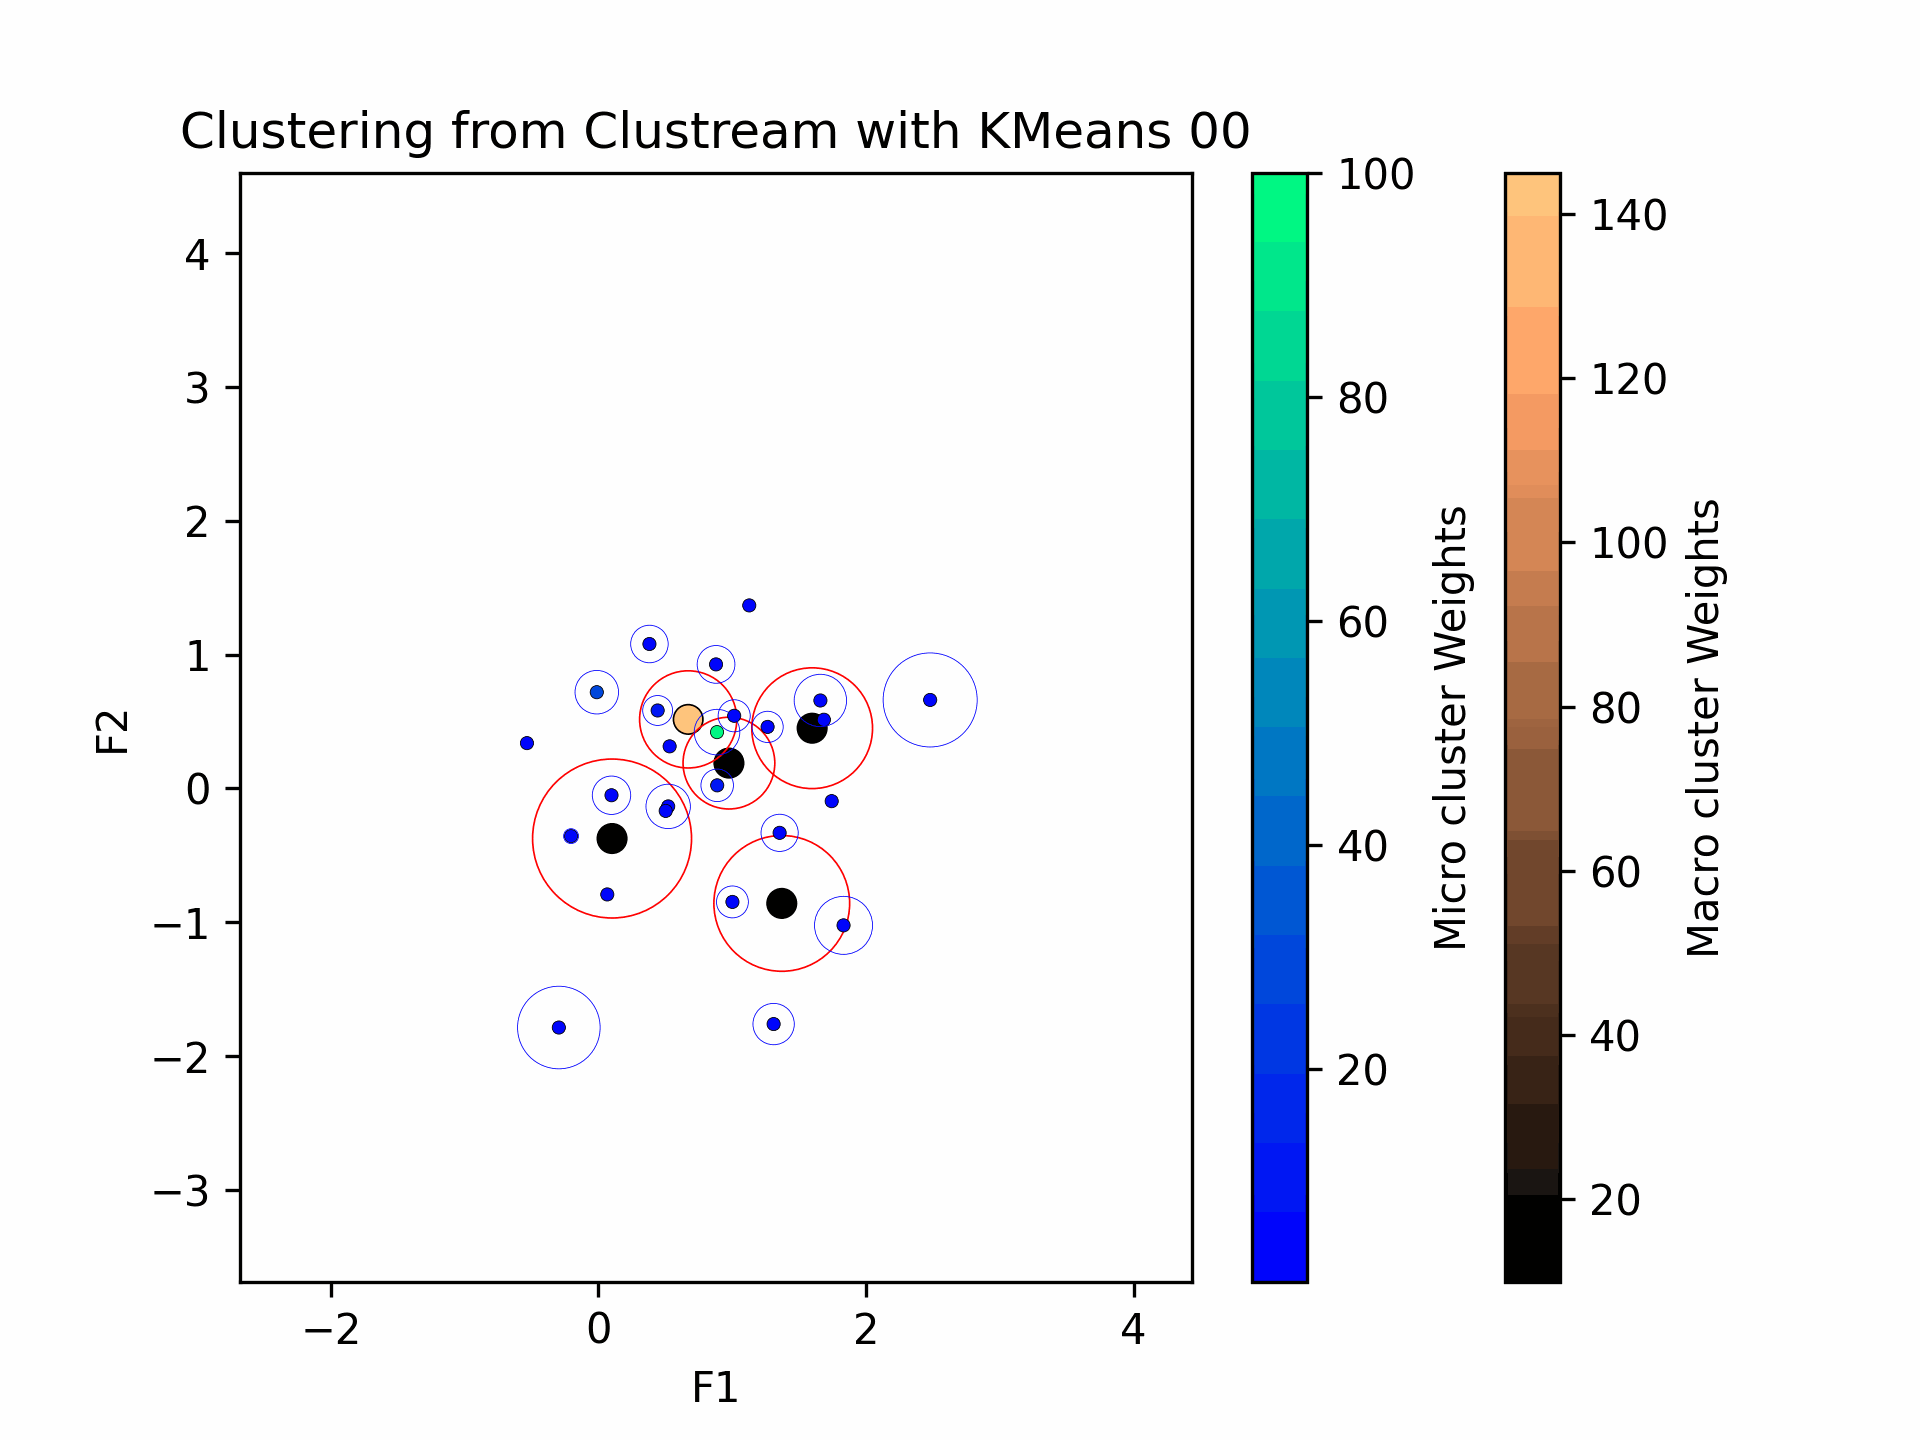

In [18]:
from IPython.display import Image

# Display the GIF
Image(filename="./Clustream_with_Kmeans_clustering_evolution.gif")